In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import hashlib
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = 'Superstore_Cleaned.csv'  # Replace with your file path
df = pd.read_csv(file_path, encoding='latin1')

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Quarter', 'Shipping Time', 'Quarter', 'Year'],
      dtype='object')

In [4]:
df.head(3)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Quarter,Shipping Time,Quarter,Year
0,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.96,2,0.0,41.9136,2016,11,4,3,4,2016
1,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.94,3,0.0,219.5820,2016,11,4,3,4,2016
2,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.62,2,0.0,6.8714,2016,6,2,4,2,2016


# Slide 4: Product Performance - The Profit Drivers


Slide 4: Profit by Product Category:
 Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


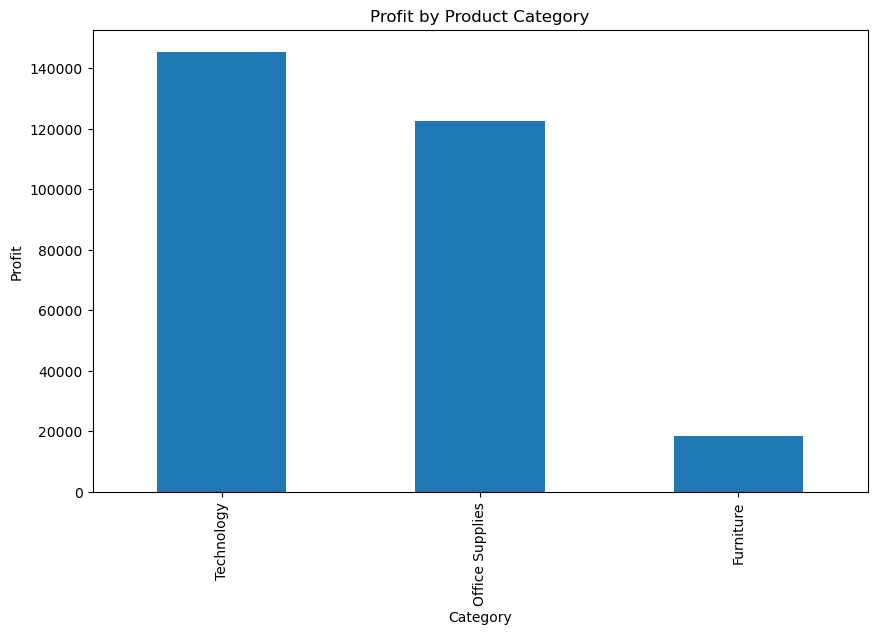

In [5]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("\nSlide 4: Profit by Product Category:\n", category_profit)
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar')
plt.title('Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

# Slide 5: Diving Deeper - Sub-Category Insights

In [6]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print("\nSales by Sub-Category:\n", subcategory_sales.head(10))
print("\nProfit by Sub-Category:\n", subcategory_profit.head(10))


Sales by Sub-Category:
 Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

Profit by Sub-Category:
 Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Name: Profit, dtype: float64


In [7]:
# df['Month'] = df['Order Date'].dt.month

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Quarter', 'Shipping Time', 'Quarter', 'Year'],
      dtype='object')

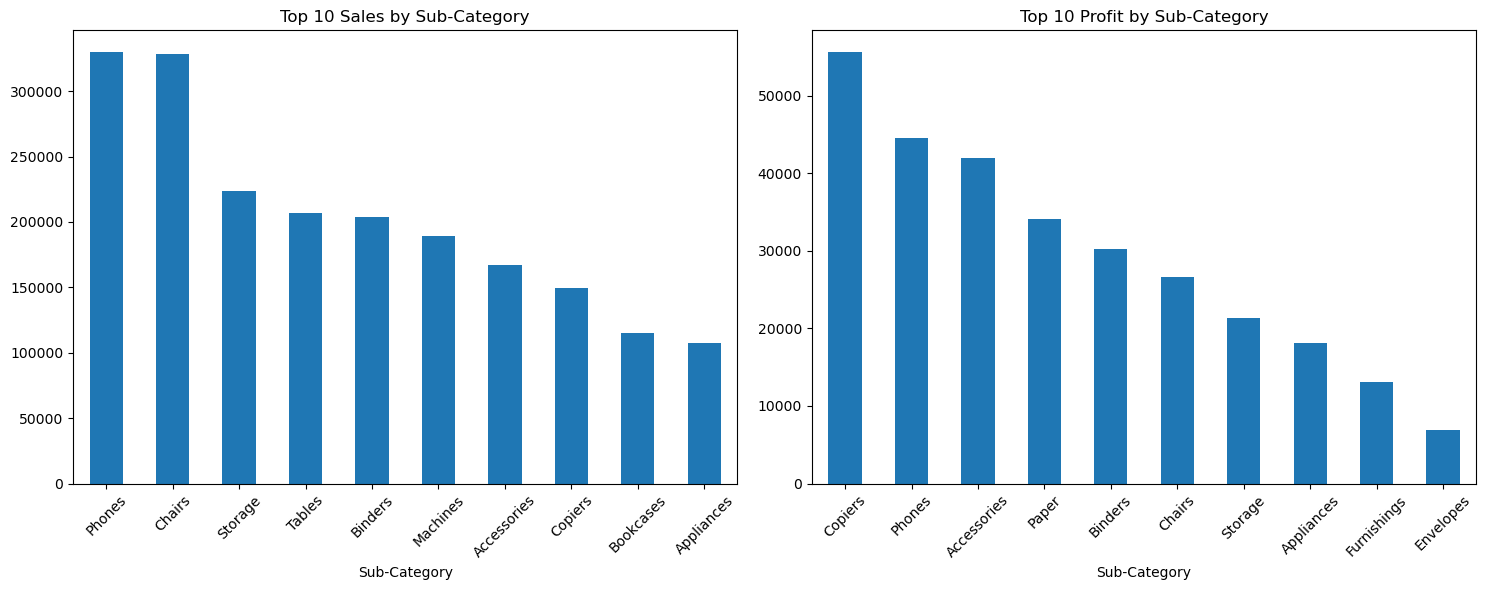

In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
subcategory_sales.head(10).plot(kind='bar')
plt.title('Top 10 Sales by Sub-Category')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
subcategory_profit.head(10).plot(kind='bar')
plt.title('Top 10 Profit by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Quarter', 'Shipping Time', 'Quarter', 'Year'],
      dtype='object')

## Slide 6: Time for Trends - Seasonal Opportunities
## Check the E Commerce Analysis (Tab)

In [11]:
# monthly_sales = df['Sales'].resample('Month').sum()
# quarterly_sales = df['Sales'].resample('Quarter').sum()
# print("\nMonthly Sales Trend:\n", monthly_sales.head())
# print("\nQuarterly Sales:\n", quarterly_sales)

In [12]:
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# monthly_sales.plot()
# plt.title('Monthly Sales Trend')
# plt.subplot(1, 2, 2)
# quarterly_sales.plot(kind='bar')
# plt.title('Quarterly Sales')
# plt.tight_layout()
# plt.show()

## Slide 7: Customer Value - The Loyal Base


Profit by Customer Segment:
 Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


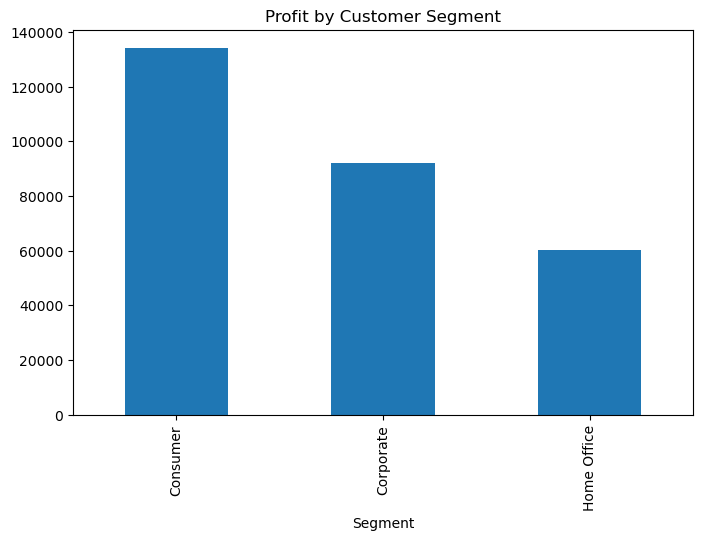

In [13]:
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print("\nProfit by Customer Segment:\n", segment_profit)
plt.figure(figsize=(8, 5))
segment_profit.plot(kind='bar')
plt.title('Profit by Customer Segment')
plt.show()

## Slide 8: Regional Performance - Growth Hotspots


Sales by Region:
 Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


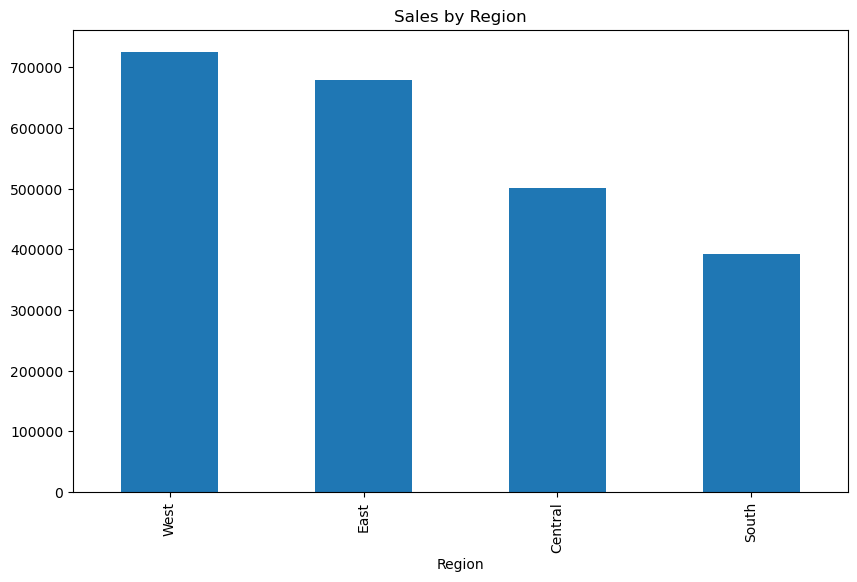

In [14]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Region:\n", region_sales)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.show()

In [15]:
# df['Year'] = df.index.year
yearly_sales = df.groupby(['Region', 'Year'])['Sales'].sum().unstack()
yearly_sales_pct_change = yearly_sales.pct_change(axis=1) * 100
print("\nYearly Sales Percent Change by Region:\n", yearly_sales_pct_change)


Yearly Sales Percent Change by Region:
 Year     2014       2015       2016       2017
Region                                        
Central   NaN  -0.928312  43.310319  -0.224682
East      NaN  21.488578  15.578228  17.930063
South     NaN -31.282776  31.180282  31.295336
West      NaN  -5.353409  33.946703  33.415900


## Slide 9: Order Value - Maximizing Each Transaction

In [16]:
average_order_value = df.groupby('Order ID')['Sales'].sum().mean()
print(f"\nAverage Order Value: ${average_order_value:.2f}")


Average Order Value: $458.61


## Slide 10: Discounts and Profit - A Delicate Balance

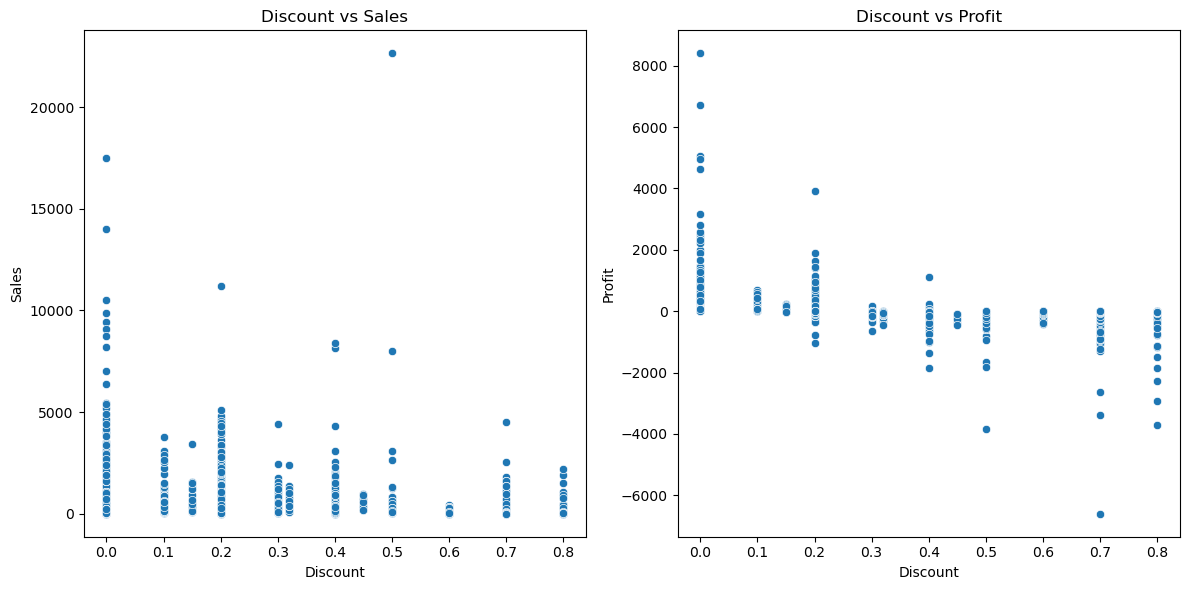

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Discount vs Sales')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.tight_layout()
plt.show()

## S 11: Shipping Insights - Efficiency Matters

In [18]:
ship_mode_counts = df.groupby(['Region', 'Ship Mode']).size().unstack(fill_value=0)
print("\nShip Mode Counts by Region:\n", ship_mode_counts)


Ship Mode Counts by Region:
 Ship Mode  First Class  Same Day  Second Class  Standard Class
Region                                                        
Central            299       120           465            1439
East               490       155           530            1673
South              234        83           329             974
West               515       185           621            1882


## Slide 12: Correlation Analysis - The Power of Relationships


Correlation Matrix:
                  Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497   
Postal Code    0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961   
Sales         -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064   
Quantity      -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253   
Discount       0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487   
Profit         0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000   
Order Year     0.015430     0.004299 -0.009679 -0.005810 -0.002662  0.004670   
Order Month   -0.018732     0.026234 -0.000625  0.023355 -0.004935 -0.000502   
Order Quarter -0.021651     0.027770 -0.002501  0.026546 -0.001620 -0.002830   
Shipping Time -0.001446    -0.009771 -0.007354  0.018298  0.000408 -0.004649   
Quarter       -0.021651     0.027770 -0.002501  0.026546 -0.001620 -0.002830   
Year           0.0

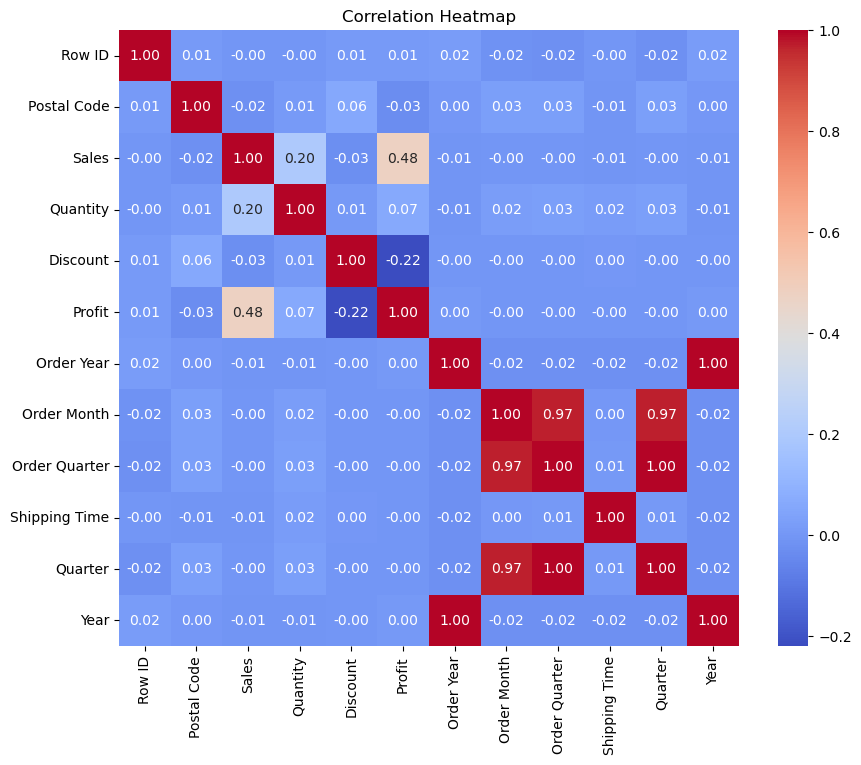

In [19]:
numeric_cols = df.select_dtypes(include=['number']).columns
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= ".2f")
    plt.title('Correlation Heatmap')
    plt.show()

## Machine Learning

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# # Calculate RFM (Recency, Frequency, Monetary) Features
# # if 'Order Date' in df.columns and 'Sales' in df.columns:
# # Recency
# max_date = df['Order Date'].max()
# rfm_recency = df.groupby('Customer ID')['Order Date'].max().apply(lambda x: (max_date - x).days)

# # Frequency
# rfm_frequency = df.groupby('Customer ID')['Order ID'].nunique()

# # Monetary Value
# rfm_monetary = df.groupby('Customer ID')['Sales'].sum()

# # Create RFM DataFrame
# rfm_df = pd.DataFrame({
# 'Recency': rfm_recency,
# 'Frequency': rfm_frequency,
# 'Monetary': rfm_monetary
# })